<a href="https://colab.research.google.com/github/bundickm/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Michael_Bundick_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling

In this Sprint Challenge you will use data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the Sprint Challenge!
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html]) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

## Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
#provided code to import pandas and load csv's
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

## Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [2]:
#first merge, check shape to confirm
cell_pop = cell_phones.merge(population)
cell_pop.shape

(8590, 4)

In [3]:
#check head to take a peak and visually confirm
cell_pop.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [4]:
#first merge, check shape to confirm
cell_pop = cell_pop.merge(geo_country_codes[['geo','country']])
cell_pop.shape

(8590, 5)

In [5]:
#check head to take a peak and visually confirm
cell_pop.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


## Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [6]:
#make cells_per_person feature and check against provided value
cell_pop['cells_per_person'] = cell_pop['cell_phones_total']/cell_pop['population_total']
cell_pop[cell_pop['geo'] == 'usa'].sort_values('cells_per_person', ascending=False).head(5)

,geo,time,cell_phones_total,population_total,country,cells_per_person
8133,usa,2016,395881000.0,322179605,United States,1.228759
8134,usa,2017,395881000.0,324459463,United States,1.220125
8132,usa,2015,382307000.0,319929162,United States,1.194974
8131,usa,2014,355500000.0,317718779,United States,1.118914
8130,usa,2013,310698000.0,315536676,United States,0.984665


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [7]:
#convert the geo column to upper case and confirm
cell_pop['geo'] = cell_pop['geo'].str.upper()
cell_pop.head()

,geo,time,cell_phones_total,population_total,country,cells_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


## Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [8]:
#describe numbers, describe defaults to excluding non-numeric columns
cell_pop.describe()

,time,cell_phones_total,population_total,cells_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [9]:
#describe everything but numbers
cell_pop.describe(exclude='number')

,geo,country
count,8590,8590
unique,195,195
top,HND,Oman
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [11]:
#top 5 countries for number of cell phones. Confirmed with Ryan Herr that output didn't need to be a 5x2 like above.
cell_pop[cell_pop['time'] == 2017].sort_values('cell_phones_total', ascending=False).head(5)

,geo,time,cell_phones_total,population_total,country,cells_per_person
1496,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978
3595,IND,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382
3549,IDN,2017,"458,923,202.0",263991379,Indonesia,1.738402230172827
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354
1084,BRA,2017,"236,488,548.0",209288278,Brazil,1.1299655683535224


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [12]:
#Find the cell where geo is USA and cells outnumber humans which means cells_per_person has a value greater than 1
#Answer: 2014
cell_pop[(cell_pop['geo'] == 'USA') & (cell_pop['cells_per_person'] > 1)].head(1)

,geo,time,cell_phones_total,population_total,country,cells_per_person
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164


## Part 4. Reshape data

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [13]:
#pull a subset of the data based on above criteria
countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']
cell_pop_subset = cell_pop.loc[cell_pop['country'].isin(countries)][cell_pop['time'] >= 2007]

#drop that subset into a pivot table and output (saved pivot table for bonus question)
five_country_pivot = pd.pivot_table(cell_pop_subset, index='country', columns='time', values='cell_phones_total')
five_country_pivot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


#### OPTIONAL BONUS QUESTION!

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [14]:
#add a new column to measure increase over the time period
five_country_pivot['10_year_delta'] = five_country_pivot[2017] - five_country_pivot[2007]

#sort on that new column to find India is the answer
five_country_pivot.sort_values('10_year_delta', ascending=False).head(1)


time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,10_year_delta
country,,,,,,,,,,,,
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0","935,282,277.0"


If you have the time and curiosity, what other questions can you ask and answer with this data?

In [15]:
#take a look at what we have to play with
cell_pop.head()

,geo,time,cell_phones_total,population_total,country,cells_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


###Population Change

In [0]:
#New feature, change over each row in the population total
cell_pop['pop_delta'] = cell_pop['population_total'].diff()

In [0]:
#set 1960's population change to 0 since there is no prior year's population
cell_pop.loc[cell_pop['time'] == 1960, 'pop_delta'] = 0

In [18]:
#confirm
cell_pop[cell_pop['geo']=='USA'].head()

,geo,time,cell_phones_total,population_total,country,cells_per_person,pop_delta
8092,USA,1960,0.0,186808228,United States,0.0,0.0
8093,USA,1965,0.0,199815540,United States,0.0,"13,007,312.0"
8094,USA,1970,0.0,209588150,United States,0.0,"9,772,610.0"
8095,USA,1975,0.0,219205296,United States,0.0,"9,617,146.0"
8096,USA,1976,0.0,221239215,United States,0.0,"2,033,919.0"


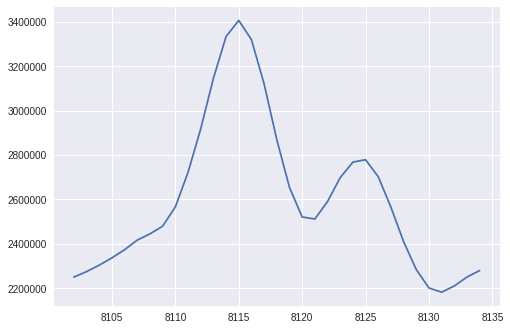

In [19]:
#start graph in '84 because there are year skips in the data before then
cell_pop[(cell_pop['geo']=='USA') & (cell_pop['time'] > 1984)]['pop_delta'].plot.line()

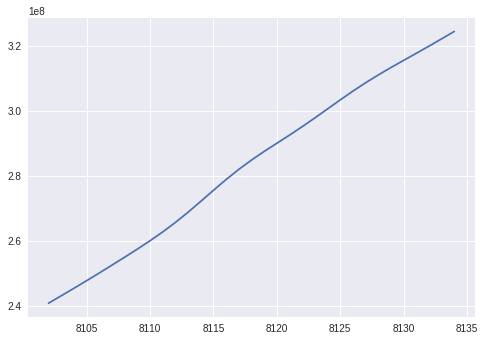

In [20]:
#relatively linear increase in population for USA
cell_pop[(cell_pop['geo']=='USA') & (cell_pop['time'] > 1984)]['population_total'].plot.line()

###Cell Phone Delta

In [23]:
#Quickly add in another feature by mimicking what we just did
cell_pop['cell_delta'] = cell_pop['cell_phones_total'].diff()
cell_pop.loc[cell_pop['time'] == 1960, 'cell_delta'] = 0
cell_pop[cell_pop['geo']=='USA']

,geo,time,cell_phones_total,population_total,country,cells_per_person,pop_delta,cell_delta
8092,USA,1960,0.0,186808228,United States,0.0,0.0,0.0
8093,USA,1965,0.0,199815540,United States,0.0,"13,007,312.0",0.0
8094,USA,1970,0.0,209588150,United States,0.0,"9,772,610.0",0.0
8095,USA,1975,0.0,219205296,United States,0.0,"9,617,146.0",0.0
8096,USA,1976,0.0,221239215,United States,0.0,"2,033,919.0",0.0
8097,USA,1977,0.0,223324042,United States,0.0,"2,084,827.0",0.0
8098,USA,1978,0.0,225449657,United States,0.0,"2,125,615.0",0.0
8099,USA,1979,0.0,227599878,United States,0.0,"2,150,221.0",0.0
8100,USA,1980,0.0,229763052,United States,0.0,"2,163,174.0",0.0
8101,USA,1984,"91,600.0",238573861,United States,0.0003839481811462992,"8,810,809.0","91,600.0"


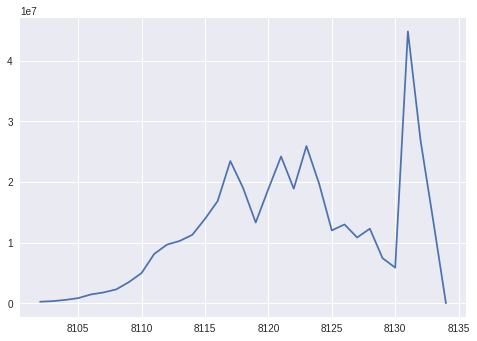

In [24]:
#Absolute flood of cell phones in 2014
#2007 we see a slow down in cell phones begin which is odd, that is when the first iPhone came out, maybe price?
cell_pop[(cell_pop['geo']=='USA') & (cell_pop['time'] > 1984)]['cell_delta'].plot.line()

###Cell Phones by Region

In [0]:
#add in regions
cell_pop = cell_pop.merge(geo_country_codes[['country','world_4region']])

In [26]:
#confirm proper merge
cell_pop[cell_pop['time'] == 2017]

,geo,time,cell_phones_total,population_total,country,cells_per_person,pop_delta,cell_delta,world_4region
45,AFG,2017,"23,929,713.0",35530081,Afghanistan,0.6735057260353557,"874,049.0","2,326,731.0",asia
91,AGO,2017,"13,323,952.0",29784193,Angola,0.4473497737541521,"970,730.0","322,828.0",africa
137,ALB,2017,"3,497,950.0",2930187,Albania,1.19376340144844,"3,839.0","128,194.0",europe
183,AND,2017,"80,337.0",76965,Andorra,1.0438121223932957,-316.0,"4,205.0",europe
219,ARE,2017,"19,826,224.0",9400145,United Arab Emirates,2.109140231347495,"130,533.0","-78,869.0",asia
265,ARG,2017,"61,897,379.0",44271041,Argentina,1.3981460024850105,"423,611.0","-1,826,313.0",americas
311,ARM,2017,"3,488,524.0",2930450,Armenia,1.1904396935624222,"5,634.0","53,957.0",europe
396,AUS,2017,"27,553,000.0",24450561,Australia,1.1268862092775704,"324,713.0","1,002,000.0",asia
442,AUT,2017,"14,924,340.0",8735453,Austria,1.7084792282666967,"23,316.0","654,340.0",europe
488,AZE,2017,"10,127,000.0",9827589,Azerbaijan,1.0304663737972761,"102,213.0","-62,000.0",europe


In [27]:
#No surprise, Asia has the most cell phones in 2017
cell_pop[cell_pop['time'] == 2017].groupby('world_4region')['cell_phones_total'].sum()

world_4region
africa       938,405,523.0
americas   1,114,911,895.0
asia       4,541,076,307.0
europe     1,056,635,107.0
Name: cell_phones_total, dtype: float64

In [28]:
#average number of cell phones per person, Europe is still winning out
cell_pop[cell_pop['time'] == 2017].groupby('world_4region')['cells_per_person'].mean()

world_4region
africa     0.8706599205737995
americas   1.1181200395957178
asia       1.1691051088404862
europe     1.2081162918200803
Name: cells_per_person, dtype: float64

###Rename

In [29]:
#Probably should have done it sooner but renamed some of the columns
cell_pop.columns = ['geo', 'year', 'cell_phones_total', 'population_total', 
                    'country', 'cells_per_person', 'pop_delta', 'cell_delta', 
                    'region']
cell_pop.head()

,geo,year,cell_phones_total,population_total,country,cells_per_person,pop_delta,cell_delta,region
0,AFG,1960,0.0,8996351,Afghanistan,0.0,0.0,0.0,asia
1,AFG,1965,0.0,9938414,Afghanistan,0.0,"942,063.0",0.0,asia
2,AFG,1970,0.0,11126123,Afghanistan,0.0,"1,187,709.0",0.0,asia
3,AFG,1975,0.0,12590286,Afghanistan,0.0,"1,464,163.0",0.0,asia
4,AFG,1976,0.0,12840299,Afghanistan,0.0,"250,013.0",0.0,asia


###Population Change by Region

In [0]:
sixty = cell_pop[cell_pop['year'] == 1960].groupby('region')['population_total'].sum()
twenty_seventeen = cell_pop[cell_pop['year'] == 2017].groupby('region')['population_total'].sum()

In [42]:
#Massive population boom in asia compared to any other region
twenty_seventeen-sixty

region
africa       878763275
americas     578193866
asia        2669285446
europe       204879196
Name: population_total, dtype: int64

In [45]:
print('World Population Increase from 1960-2017:', sum(twenty_seventeen-sixty))

World Population Increase from 1960-2017: 4331121783
